<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Decision_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the US-pumpkins dataset which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by the United States Department of Agriculture.

In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.77      0.74       146
           1       0.55      0.48      0.51        85

    accuracy                           0.66       231
   macro avg       0.63      0.62      0.63       231
weighted avg       0.65      0.66      0.66       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.6623376623376623


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [ ]:
classes = y.unique()

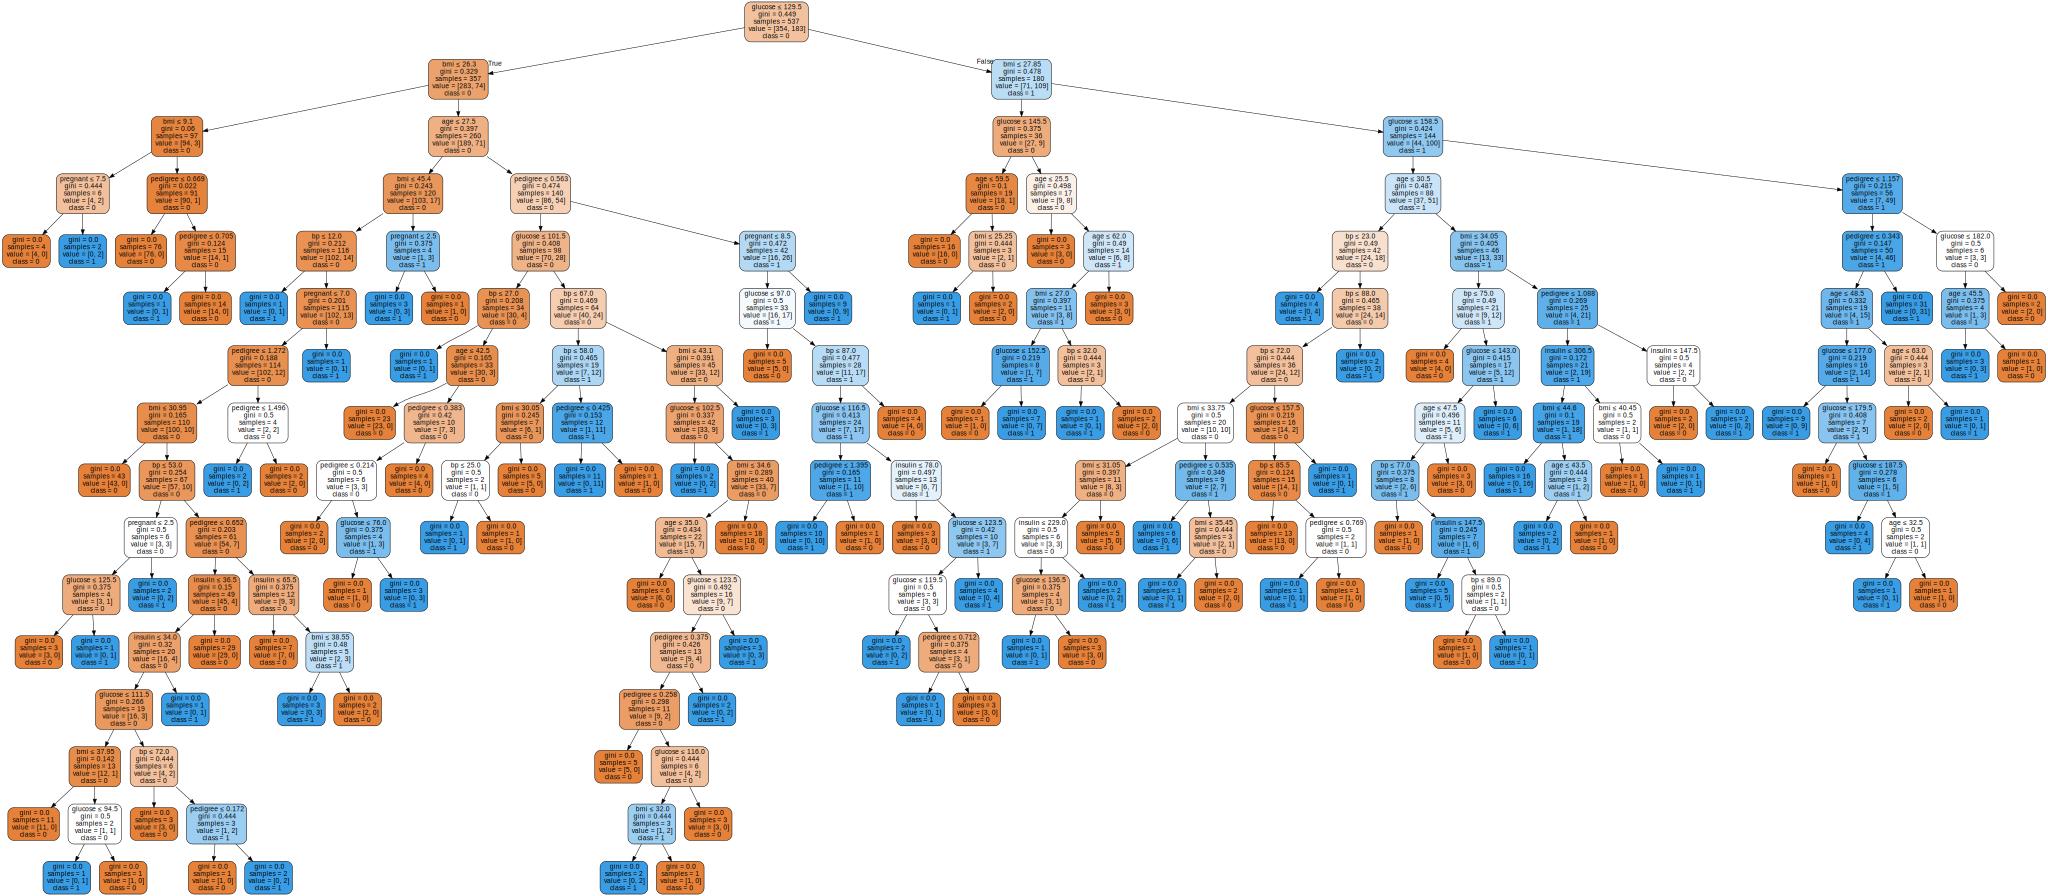

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.5024038461538461, 0.9166666666666666, 'X[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [555, 571, 562, 549, 559]'),
 Text(0.27884615384615385, 0.75, 'X[290] <= 0.5\ngini = 0.784\nsamples = 2285\nvalue = [552, 231, 556, 547, 399]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[334] <= 0.5\ngini = 0.784\nsamples = 2105\nvalue = [548, 231, 551, 378, 397]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[185] <= 0.5\ngini = 0.786\nsamples = 1886\nvalue = [382, 229, 539, 352, 384]'),
 Text(0.038461538461538464, 0.25, 'X[68] <= 0.5\ngini = 0.781\nsamples = 1755\nvalue = [378, 217, 534, 352, 274]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.75\nsamples = 1355\nvalue = [325, 141, 512, 191, 186]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.733\nsamples = 400\nvalue = [53, 76, 22, 161, 88]'),
 Text(0.11538461538461539, 0.25, 'X[129] <= 0.5\ngini = 0.284\nsamples = 131\nvalue = [4, 12, 5, 0, 110]'),
 Text(0.09615384615384616, 0.0833333333333333

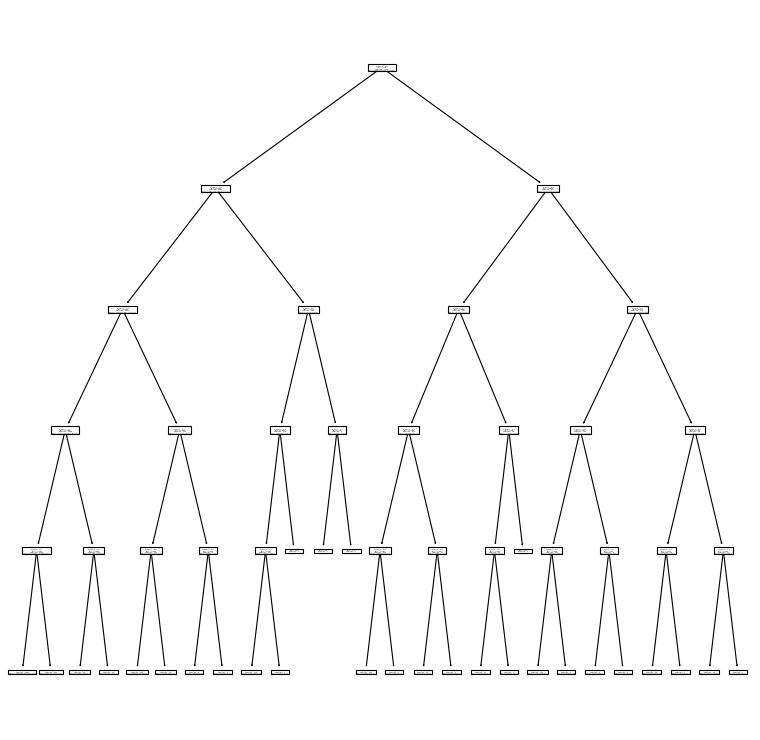

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

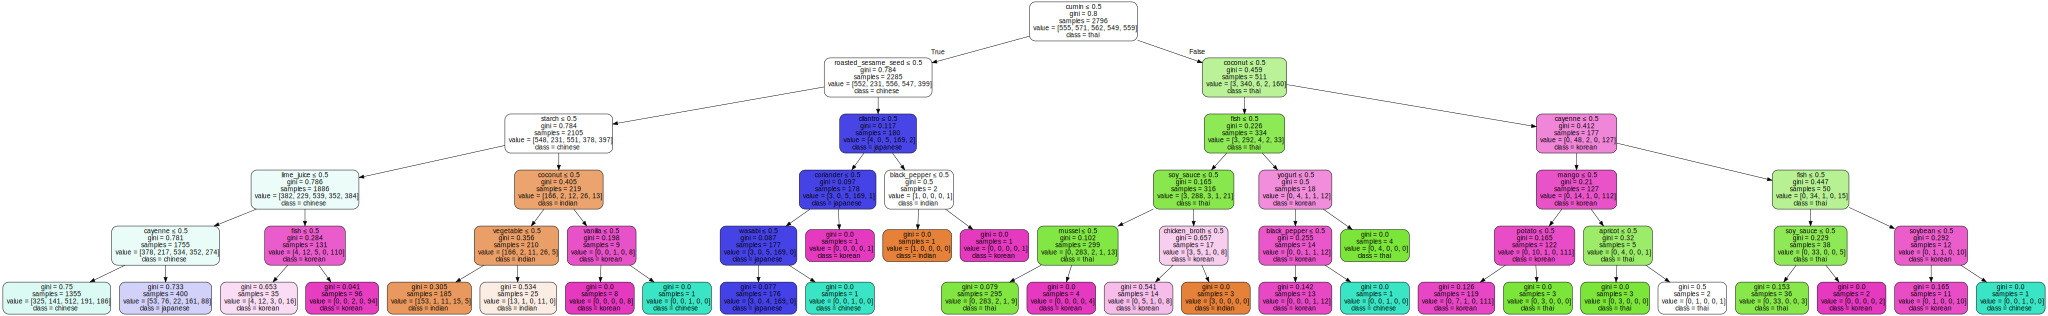

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.72      0.30      0.42       244
      indian       0.92      0.53      0.67       228
    japanese       0.37      0.90      0.52       237
      korean       0.57      0.58      0.57       250
        thai       0.81      0.44      0.57       240

    accuracy                           0.55      1199
   macro avg       0.68      0.55      0.55      1199
weighted avg       0.68      0.55      0.55      1199



In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.73      0.64      0.68       244
      indian       0.86      0.81      0.83       228
    japanese       0.48      0.83      0.61       237
      korean       0.80      0.64      0.71       250
        thai       0.86      0.60      0.71       240

    accuracy                           0.70      1199
   macro avg       0.75      0.70      0.71      1199
weighted avg       0.75      0.70      0.71      1199



In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [ ]:
y = cars['origin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

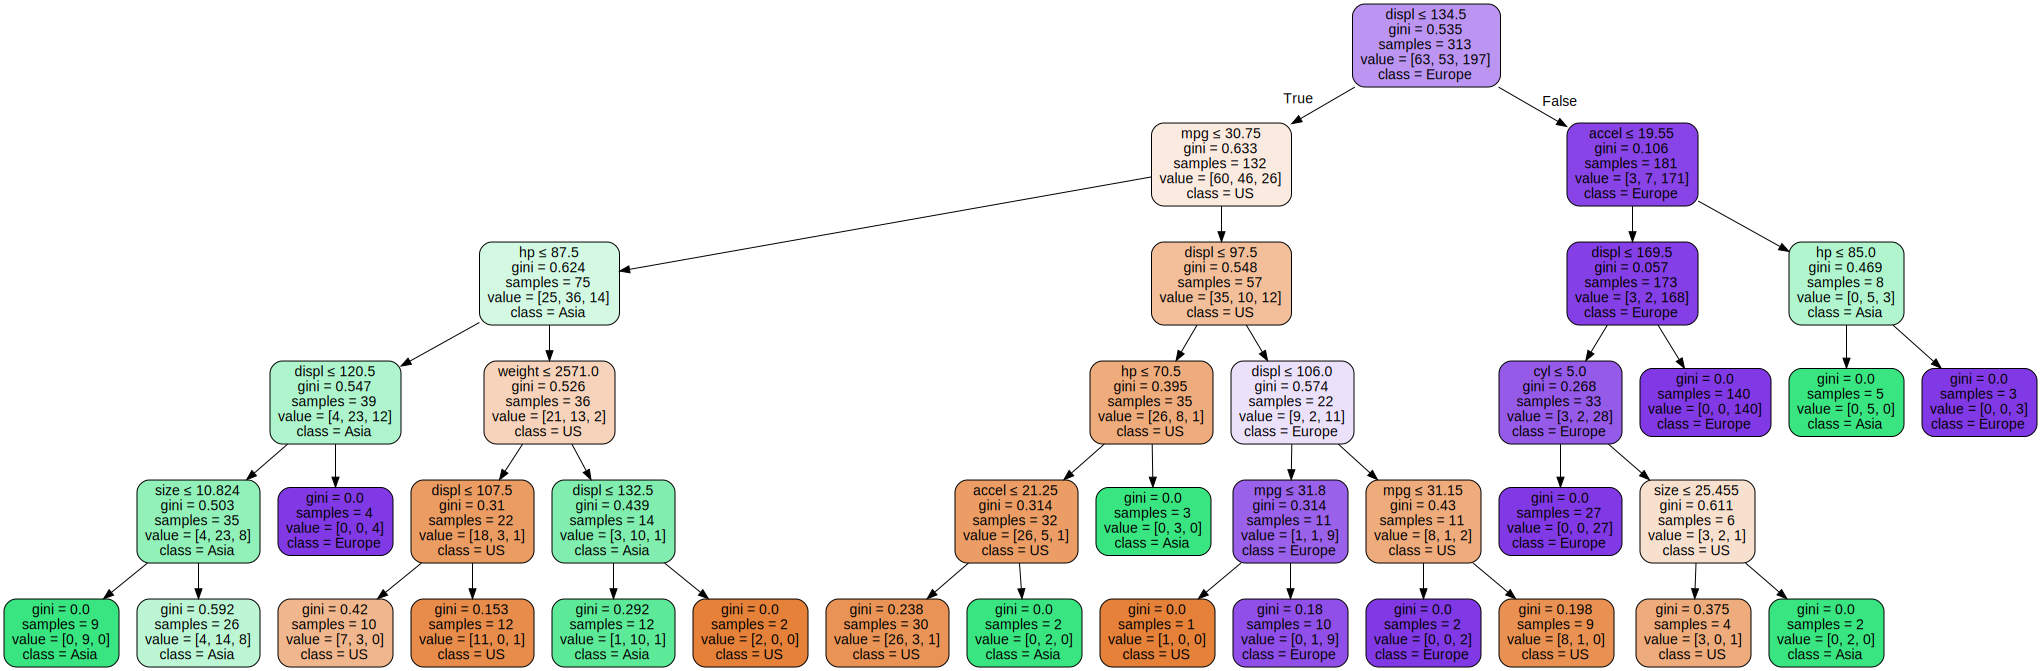

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Asia       0.74      0.88      0.80        16
      Europe       0.53      0.60      0.56        15
          US       0.91      0.81      0.86        48

    accuracy                           0.78        79
   macro avg       0.72      0.76      0.74        79
weighted avg       0.80      0.78      0.79        79



In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")